In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.api.types as pdtypes
from plotnine import *
from plotnine.data import *

%matplotlib inline

In [ ]:
primary_school_data = pd.read_csv('primary-school-data.csv')
primary_school_data.describe()

In [ ]:
primary_school_data.head()

In [ ]:
primary_school_data.info()

# Seaborn Scatterplot

In [ ]:
sns.scatterplot(x='size',y='percent_hispanic',data=primary_school_data)

In [ ]:
sns.scatterplot(x='size',y='percent_white',hue='size',data=primary_school_data)

In [ ]:
sns.scatterplot(x='size',y='percent_white',size='size',data=primary_school_data)

# PokeDex Data

In [ ]:
poke=pd.read_csv('pokemon.csv')

In [ ]:
poke.shape

In [ ]:
poke.info

#  Plotting with Seaborn
One of Seaborn's greatest strengths is its diversity of plotting functions. For instance, making a scatter plot is just one line of code using the lmplot() function.

There are two ways you can do so.

The first way (recommended) is to pass your DataFrame to the data= argument, while passing column names to the axes arguments, x= and y=.
The second way is to directly pass in Series of data to the axes arguments.
For example, let's compare the Attack and Defense stats for our Pokémon:



In [ ]:
# Recommended way
sns.lmplot(x='Attack', y='Defense', data=poke)

NOTE: Seaborn doesn't have a dedicated scatter plot function, which is why you see a diagonal line. We actually used Seaborn's function for fitting and plotting a regression line.

However each plotting function has several useful options that you can set. Here's how we can tweak the lmplot():

First, we'll set fit_reg=False to remove the regression line, since we only want a scatter plot.
Then, we'll set hue='Stage' to color our points by the Pokémon's evolution stage. This hue argument is very useful because it allows you to express a third dimension of information using color

<h3>Scatterplot arguments</h3>

In [ ]:
sns.lmplot(x='Attack', y='Defense', data=poke,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage


#  Customizing with Matplotlib
NOTE: Seaborn is a high-level interface to Matplotlib. From our experience, Seaborn will get you most of the way there, but you'll sometimes need to bring in Matplotlib.

Setting your axes limits is one of those times, but the process is pretty simple:

First, invoke your Seaborn plotting function as normal.
Then, invoke Matplotlib's customization functions. In this case, we'll use its ylim() and xlim() functions.
Here's our new scatter plot with sensible axes limits:

In [ ]:
1
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=poke,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

# Pandas and seaborn
Even though this is a Seaborn tutorial, Pandas actually plays a very important role. You see, Seaborn's plotting functions benefit from a base DataFrame that's reasonably formatted.

For example, let's say we wanted to make a box plot for our Pokémon's combat stats

<h3>Boxplot</h3>

In [ ]:
sns.boxplot(data=poke)

That's an OK start, but there are some columns we'd probably like to remove:

We can remove the Total since we have individual stats.
We can remove the Stage and Legendary columns because they aren't combat stats.
In turns out that this isn't easy to do within Seaborn alone. Instead, it's much simpler to pre-format your DataFrame.

Let's create a new DataFrame called <b>stats_df</b> that only keeps the stats columns:



In [ ]:
# Pre-format DataFrame
stats_df = poke.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

Seaborn themes
Another advantage of Seaborn is that it comes with decent style themes right out of the box. The default theme is called 'darkgrid'.

Next, we'll change the theme to 'whitegrid' while making a violin plot.

Violin plots are useful alternatives to box plots.
They show the distribution (through the thickness of the violin) instead of only the summary statistics.
For example, we can visualize the distribution of Attack by Pokémon's primary type:

Set theme, then plot <b>violin </b>

In [ ]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=poke)

As you can see, Dragon types tend to have higher Attack stats than Ghost types, but they also have greater variance.

Now, Pokémon fans might find something quite jarring about that plot: The colors are nonsensical. Why is the Grass type colored pink or the Water type colored orange? We must fix this...

# Color palettes
Fortunately, Seaborn allows us to set custom color palettes. We can simply create an ordered Python list of color hex values.

Let's use Bulbapedia to help us create a new color palette:

In [ ]:

#Pokemon color palettePython
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

Wonderful. Now we can simply use the palette= argument to recolor our chart.

# Resizing and recoloring the Plot

In [ ]:
# Violin plot with Pokemon color palette
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(x='Type 1', y='Attack', data=poke, palette=pkmn_type_colors) # Set color palette

This is much better

Violin plots are great for visualizing distributions. However, since we only have 151 Pokémon in our dataset, we may want to simply display each point.

That's where the swarm plot comes in. This visualization will show each point, while "stacking" those with similar values:

# Swarm plots

In [ ]:
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=poke, palette=pkmn_type_colors)

# Combining Swarm plot and Violin plot

<h3>Overlaying plots.</h3>

Straightforward to overlay plots using Seaborn, and it works the same way as with Matplotlib. Here's what we'll do:

First, we'll make our figure larger using Matplotlib.
Then, we'll plot the violin plot. However, we'll set inner=None to remove the bars inside the violins.
Next, we'll plot the swarm plot. This time, we'll make the points black so they pop out more.
Finally, we'll set a title using Matplotlib.


<h3>Overlaying swarm and violin plots</h3>

In [ ]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=poke, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=poke, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

Putting it all together.
Well, we could certainly repeat that chart for each stat. But we can also combine the information into one chart... we just have to do some data wrangling with Pandas beforehand.

First, here's a reminder of our data format:

First 5 rows of stats_df



In [ ]:
stats_df.head()

As you can see, all of our stats are in separate columns. Instead, we want to <b>melt</b> them into one column.

To do so, we'll use Pandas's melt() function. It takes 3 arguments:

First, the DataFrame to melt.
Second, ID variables to keep (Pandas will melt all of the other ones).
Finally, a name for the new, melted variable.
Here's the output:


<b>Melt Data</b>

In [ ]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

All 6 of the stat columns have been "melted" into one, and the new Stat column indicates the original stat (HP, Attack, Defense, Sp. Attack, Sp. Defense, or Speed). For example, it's hard to see here, but Bulbasaur now has 6 rows of data.

In fact, if you print the shape of these two DataFrames...

<b>Shape comparison</b>

In [ ]:
print( stats_df.shape )
print( melted_df.shape )

...you'll find that melted_df has 6 times the number of rows as stats_df.

Now we can make a swarm plot with melted_df.

But this time, we're going to set x='Stat' and y='value' so our swarms are separated by stat.
Then, we'll set hue='Type 1' to color our points by the Pokémon type.
Swarmplot with melted_df

<h3>Swarmplot with melted_df</h3>

In [ ]:
# Swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df,  hue='Type 1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #place legend outside of plot

Finally, let's make a few final tweaks for a more readable chart:
<ul>
<li>1. Enlarge the plot</li>
<li>2. Separate points by hue using the argument <b>split=True</b></li>
<li>3. Use our custom Pokemon color palette</li>
<li>4. Adjust the y-axis limits to end at 0</li>
<li>5. Place the legend to the right.</li>
</ul>


# Customizations

In [ ]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              dodge=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

# mini gallery

<b>Here are few quick-fire data visualizations, just to give you a sense of what's possible with Seaborn.</b>

<h2>Heatmap</h2>
Heatmaps help you visualize matrix-like data.


In [ ]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)

# Histogram
Histograms allow you to plot the distributions of numeric variables.


In [ ]:
# Distribution Plot (a.k.a. Histogram)
sns.displot(poke.Attack)

# Bar Plot
Bar plots help you visualize the distributions of categorical variables.


In [ ]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=poke, palette=pkmn_type_colors)
# Rotate x-labels
plt.xticks(rotation=-45)

# Cat Plot (Factor Plot)

In [ ]:
# Factor Plot
g = sns.catplot(x='Type 1', 
                   y='Attack', 
                   data=poke, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

# Density Plot
Density plots display the distribution between two variables.
<br>Tip: Consider overlaying this with a scatter plot.

In [ ]:
# Density Plot
sns.kdeplot(x='Attack',y='Defense',data=poke)

# Joint Distribution Plot
Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.

In [ ]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=poke)

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x = 'Type 1' , data = poke,hue = 'Legendary')

In [ ]:
sns.pairplot(x_vars=['Attack' , 'Defense','Sp. Atk','Sp. Def'],
             y_vars=['Attack' , 'Defense','Sp. Atk','Sp. Def'], 
             data = poke)

<b>Relation between Defense and Attack</b>

In [ ]:
sns.jointplot(x = 'Attack', y = 'Sp. Atk', data = poke,hue = 'Legendary')

<h2>Creating plots</h2>
Now we will start creating plots one by one and see how to create them<br>
<b>Scatter Plot</b>

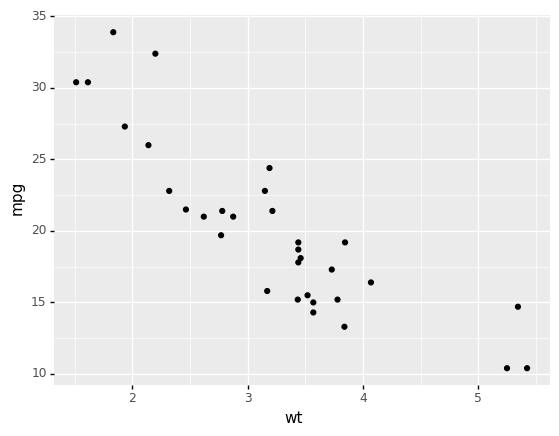

<ggplot: (8795105867662)>

In [35]:
(ggplot(mtcars, aes('wt', 'mpg')) + geom_point())

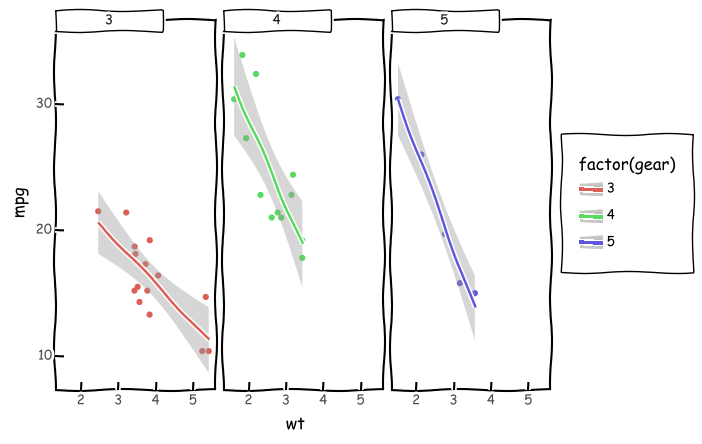

<ggplot: (8795069917910)>

In [36]:
#Scatter Plot with differnt theme
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear')
 + theme_xkcd())

# Line Plot

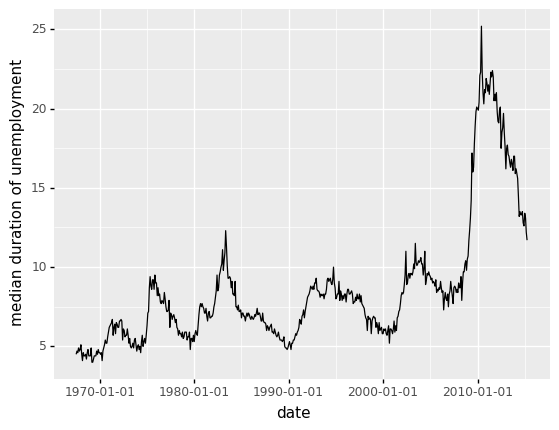

<ggplot: (8795069895656)>

In [37]:
(
    ggplot(economics, aes(x='date', y='uempmed')) 
    + geom_line() # line plot
    + labs(x='date', y='median duration of unemployment')
)


# Histogram

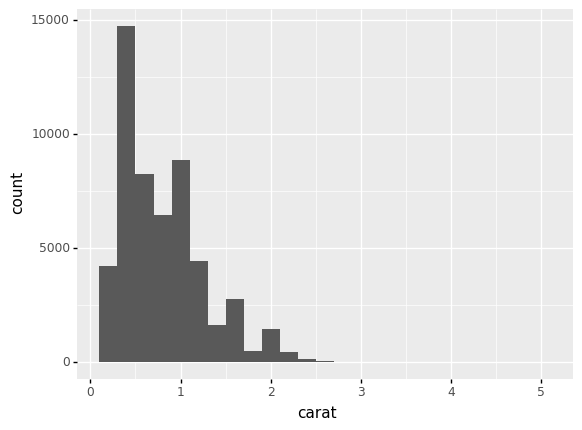

<ggplot: (8795036423617)>

In [38]:
(
    ggplot(diamonds, aes(x='carat')) 
    + geom_histogram(binwidth=0.2)
)

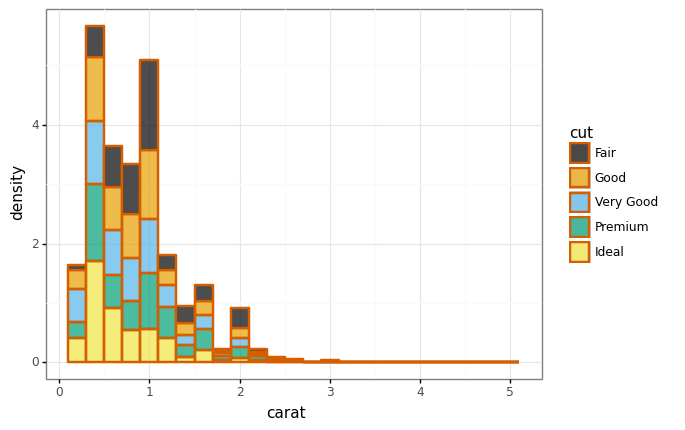

<ggplot: (8795002633012)>

In [39]:
(
    ggplot(diamonds, aes(x='carat',
                         y=after_stat('density'),
                         fill='cut'  # change the fill colour using another variable
                        ))
    + scale_fill_manual(values=["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442"]) # change the fill colour
    + geom_histogram(binwidth=0.2,
                    colour="#D55E00",# change the outline
                    size=1,          # change the thickness of the outline
                    alpha=0.7        # change the transparency
                    )
    + theme_bw()                     # play with themes (look/arrangement)
)


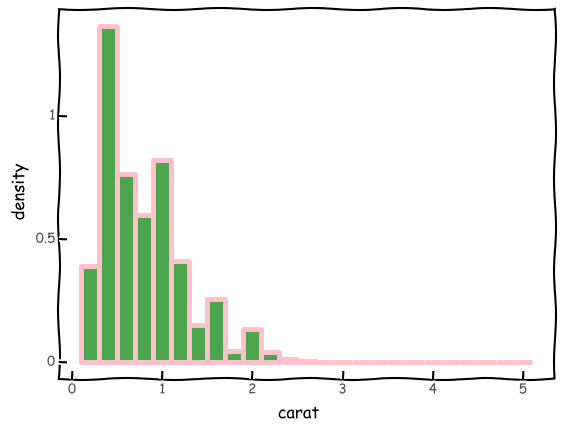

<ggplot: (8795019691337)>

In [40]:
(
    ggplot(diamonds, aes(x='carat', y=after_stat('density')))
    + geom_histogram(binwidth=0.2,
                    fill='green',  # change the fill colour (one colour)
                    colour='pink', # change the outline
                    size=2,        # change the thickness of the outline
                    alpha=0.7      # change the transparency
                    )
    + theme_xkcd()                 # play with themes (look/arrangement)
)

# Stacked Bar Chart

In [41]:
df = pd.DataFrame({
    'variable': ['gender', 'gender', 'age', 'age', 'age', 'income', 'income', 'income', 'income'],
    'category': ['Female', 'Male', '1-24', '25-54', '55+', 'Lo', 'Lo-Med', 'Med', 'High'],
    'value': [60, 40, 50, 30, 20, 10, 25, 25, 40],
})
df['variable'] = pd.Categorical(df['variable'], categories=['gender', 'age', 'income'])
df['category'] = pd.Categorical(df['category'], categories=df['category'])

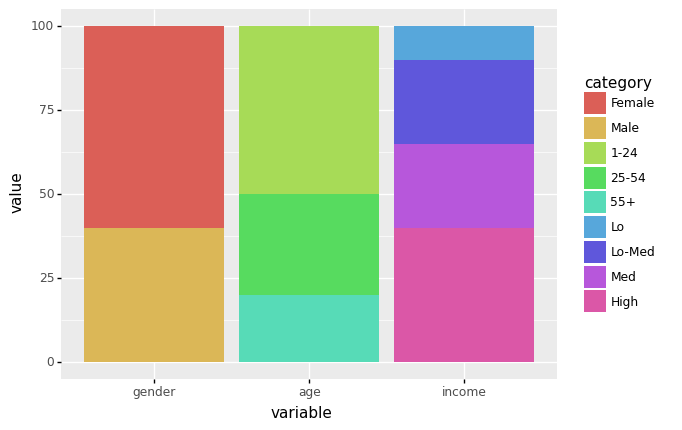

<ggplot: (8795069921169)>

In [42]:
#Plotting Data
(ggplot(df, aes(x='variable', y='value', fill='category'))
 + geom_col()
)

<h2>Violins, Boxes, Points and Lines</h2><br>
Comparing repeated measurements and their summaries<br>
<br>
Suppose you have two sets of related data and each point in the first set maps onto a point in the second set. <br>e.g. they could represent a transition from one state to another for example two measurements of the height of pupils in different years.
<br>
For demonstration we shall generate data with a before measurement and an after measurement.

In [43]:
np.random.seed(123)
n = 20
mu = (1, 2.3)
sigma = (1, 1.6)

before = np.random.normal(loc=mu[0], scale=sigma[0], size=n)
after = np.random.normal(loc=mu[1], scale=sigma[1], size=n)

df = pd.DataFrame({
    'value': np.hstack([before, after]),
    'when': np.repeat(['before', 'after'], n),
    'id': np.hstack([range(n), range(n)])
})

df['when'] = df['when'].astype(pdtypes.CategoricalDtype(categories=['before', 'after']))
df.head()

,value,when,id
0,-0.085631,before,0
1,1.997345,before,1
2,1.282978,before,2
3,-0.506295,before,3
4,0.421400,before,4


# A basic violin plot shows distributions of the two sets of data.

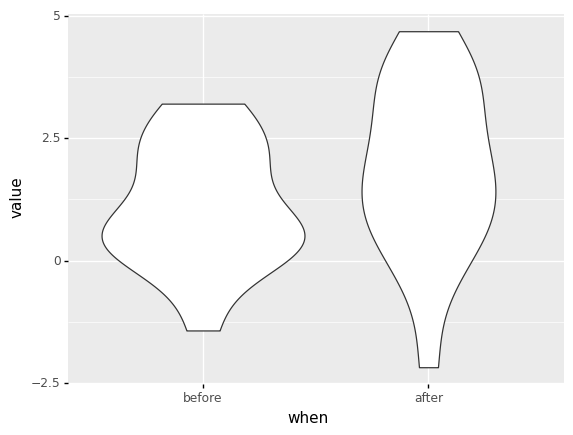

<ggplot: (8795036236328)>

In [44]:
(ggplot(df, aes('when', 'value'))
 + geom_violin(df)
)

# Add the original data in form of points.

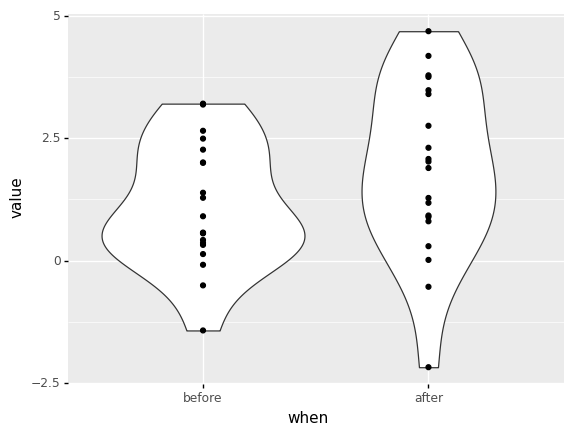

<ggplot: (8795019661436)>

In [45]:
(ggplot(df, aes('when', 'value'))
 + geom_violin(df)
 + geom_point()
)

The<b> violins are symmetrical</b> about the vertical axis and<b> half a violin has the same information as the full violin</b>. We cut (style) the violins in half and choose to alternate with the left half for the first one and the right half for the second.


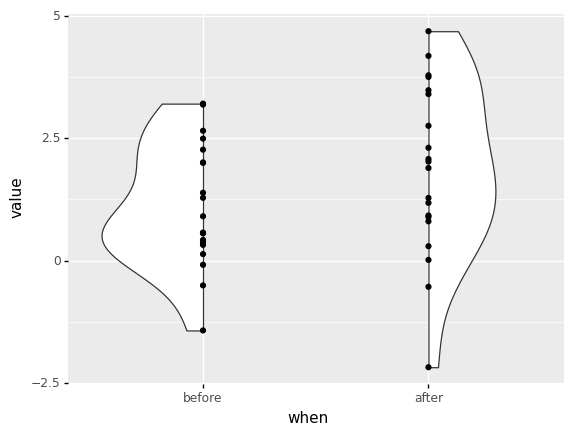

<ggplot: (8794986389751)>

In [46]:
(ggplot(df, aes('when', 'value'))
 + geom_violin(df, style='left-right') # changed
 + geom_point()
)

# Link up the points to get a sense of how the data the moves.


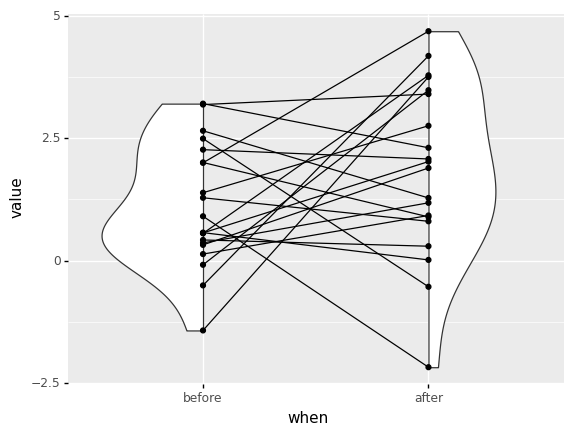

<ggplot: (8795069823028)>

In [47]:
(ggplot(df, aes('when', 'value'))
 + geom_violin(df, style='left-right') # changed
 + geom_point()
 + geom_line(aes(group='id'))          # new
)

# Make gap between the points and the violions.
i.e. shift the violins outward and the points & lines inward. We used stage mapping to get it done. For example

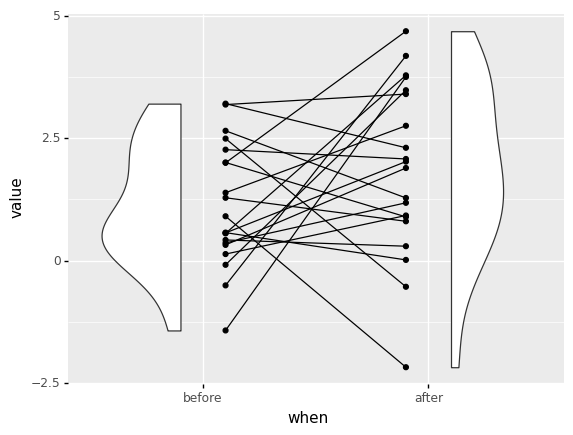

<ggplot: (8795036124004)>

In [49]:
x=stage('when', after_scale='x+shift*alt_sign(x)') #says, map the xaesthetic to the 'when' column/variable and after the scale computed the x locations add a shift to them. The calculated x locations of a discrete scale are consecutive numbers 1, 2, 3, ..., so we use that move objects of adjacent groups in opposite directions i.e $(-1)^1, (-1)^2, (-1)^3 ... = -1, 1, -1... $

# How much to shift the violin, points and lines
# 0.1 is 10% of the allocated space for the category
shift = 0.1

def alt_sign(x):
    "Alternate +1/-1 if x is even/odd"
    return (-1) ** x

m1 = aes(x=stage('when', after_scale='x+shift*alt_sign(x)'))              # shift outward
m2 = aes(x=stage('when', after_scale='x-shift*alt_sign(x)'), group='id')  # shift inward

(ggplot(df, aes('when', 'value'))
 + geom_violin(m1, style='left-right') # changed
 + geom_point(m2)                      # changed
 + geom_line(m2)                       # changed
)

<b>Add a boxplot in the gap.</b><br> The space between the flat edge of the violin and the center of the points is 2 * shift, so we can use the shift to control the width of the boxplot.

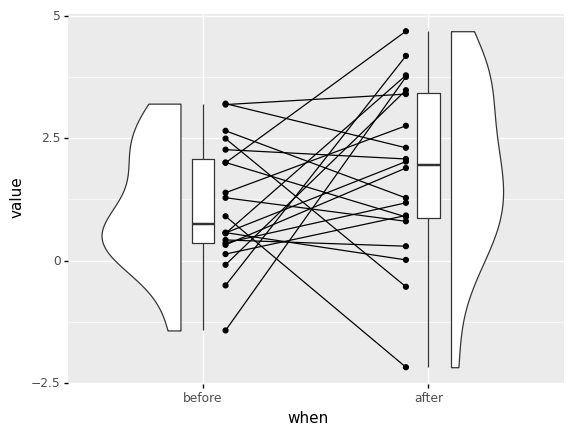

<ggplot: (8794986337097)>

In [50]:
(ggplot(df, aes('when', 'value'))
 + geom_violin(m1, style='left-right')
 + geom_point(m2)
 + geom_line(m2)
 + geom_boxplot(width=shift)
)

# Add Some Color for Flair

In [52]:
# Gallery Plot
lsize = 0.65
fill_alpha = 0.7

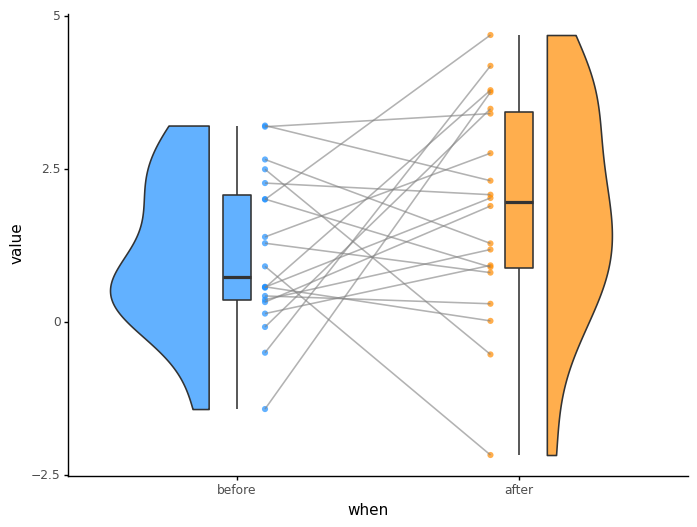

<ggplot: (8794985826639)>

In [53]:
(ggplot(df, aes('when', 'value', fill='when'))
 + geom_violin(m1, style='left-right', alpha=fill_alpha, size=lsize, show_legend=False)
 + geom_point(m2, color='none', alpha=fill_alpha, size=2, show_legend=False)
 + geom_line(m2, color='gray', size=lsize, alpha=0.6)
 + geom_boxplot(width=shift, alpha=fill_alpha, size=lsize, show_legend=False)
 + scale_fill_manual(values=['dodgerblue', 'darkorange'])
 + theme_classic()
 + theme(figure_size=(8, 6))
)